## Version1

In [1]:
image_dir = "/home/medisc/eiden/SNUH_AI_Research_2025/source/dataset/version1/image"
mask_dir = "/home/medisc/eiden/SNUH_AI_Research_2025/source/dataset/version1/mask"

In [ ]:
import glob
import sys,os 
import pandas as pd 


image_paths = [os.path.basename(path) for path in glob.glob(os.path.join(image_dir, "*"))]
mask_paths = [os.path.basename(path) for path in glob.glob(os.path.join(mask_dir, "*"))]

image_save_filenames = [os.path.basename(path) for path in glob.glob(os.path.join(image_dir, "*"))]
mask_save_filenames = [os.path.basename(path) for path in glob.glob(os.path.join(mask_dir, "*"))]

from sklearn.model_selection import train_test_split

df = pd.DataFrame({"image_filename": image_save_filenames, "mask_save_path": mask_save_filenames})
# tuning_df: 튜닝셋, test_df: 테스트셋
tuning_df, test_df = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

print(f"[INFO] Tuning set: {len(tuning_df)}")
print(f"[INFO] Test set: {len(test_df)}")

tuning_df.to_csv("tuning_df.csv", index=False)
test_df.to_csv("test_df.csv", index=False)

## Version2

In [45]:
data_dir = '/home/medisc/eiden/SNUH_AI_Research_2025/source/dataset/CAG_Datasets'

In [46]:
import glob 
import os 
import itertools

data_list, data_filenames = [], []

image_files = glob.glob(os.path.join(data_dir, '**', 'image', '*.png'), recursive=True)

# image_files에서 'image' 폴더가 경로에 포함된 경우만 추출 (함수형)
print(f"Total image files: {len(image_files)}")

Total image files: 1359


In [47]:
ARCADE_Dir = "/home/medisc/eiden/SNUH_AI_Research_2025/source/dataset/CAG_Datasets/ARCADE/annotation_O"
Un_ARCADE_Dir = "/home/medisc/eiden/SNUH_AI_Research_2025/source/dataset/CAG_Datasets/ARCADE/annotation_X"
SYNTHETIC_Dir = "/home/medisc/eiden/SNUH_AI_Research_2025/source/dataset/CAG_Datasets/SYNTHETIC"
DCA1_Dir = "/home/medisc/eiden/SNUH_AI_Research_2025/source/dataset/CAG_Datasets/DCA1"
XCAD_Dir = "/home/medisc/eiden/SNUH_AI_Research_2025/source/dataset/CAG_Datasets/XCAD"

SYNTHETIC_files = glob.glob(os.path.join(SYNTHETIC_Dir, 'image', '*.png'), recursive=True)
Un_ARCADE_files = glob.glob(os.path.join(Un_ARCADE_Dir, 'image', '*.png'), recursive=True)
ARCADE_files = glob.glob(os.path.join(ARCADE_Dir, 'image', '*.png'), recursive=True)
ARCADE_Train_files, ARCADE_Test_files = train_test_split(
    ARCADE_files, test_size=0.2, random_state=42, shuffle=True
)
DCA1_files = glob.glob(os.path.join(DCA1_Dir, 'image', '*.png'), recursive=True)
XCAD_files = glob.glob(os.path.join(XCAD_Dir, 'image', '*.png'), recursive=True)

from sklearn.model_selection import train_test_split

STEP2_ARCADE_Train_files, ARCADE_Test_files = train_test_split(
    ARCADE_files, test_size=0.2, random_state=42, shuffle=True
)

# STEP1_Train_files_w_Synthetic = list(filter(lambda x: x not in ARCADE_files, image_files))
# STEP1_Train_files_wo_Synthetic = list(filter(lambda x: x not in SYNTHETIC_files, STEP1_Train_files_w_Synthetic))
STEP1_Train_files_w_Synthetic = list(filter(lambda x: x not in ARCADE_files, image_files))
STEP1_Train_files_wo_Synthetic = list(filter(lambda x: x not in SYNTHETIC_files, STEP1_Train_files_w_Synthetic))



print(f"[Data Introduction] CAG Open Dataset")
print("Total Dataset : ", len(image_files), "개")
print(f"ARCADE Small Artery Dataset 수 : {len(ARCADE_files)}개")
print(f"ARCADE Large Artery Dataset 수 : {len(Un_ARCADE_files)}개")
print(f"SYNTHETIC Large Artery Dataset 수 : {len(SYNTHETIC_files)}개")
print(f"DCA1 Large Artery Dataset 수 : {len(DCA1_files)}개")
print(f"XCAD Large Artery Dataset 수 : {len(XCAD_files)}개")

print(f"\n[Experiment] Dataset")
print(f"STEP1(Large Artery Mask)_Train 개수: {len(STEP1_Train_files_w_Synthetic)}개 include with DCA1, XCAD, Un-Annotaed ARCADE")
print(f"STEP1(Large Artery Mask)_Train 개수: {len(STEP1_Train_files_wo_Synthetic)}개 include with DCA1, XCAD, Un-Annotaed ARCADE, SYNTHETIC")
print(f"STEP2(Large & Small Artery Mask)_Train 개수: {len(STEP2_ARCADE_Train_files)}개 include with Annotated ARCADE")
print(f"TEST(Large & Small Artery Mask)_Test 개수: {len(ARCADE_Test_files)}개 include with Annotated ARCADE")

[Data Introduction] CAG Open Dataset
Total Dataset :  1359 개
ARCADE Small Artery Dataset 수 : 195개
ARCADE Large Artery Dataset 수 : 618개
SYNTHETIC Large Artery Dataset 수 : 286개
DCA1 Large Artery Dataset 수 : 134개
XCAD Large Artery Dataset 수 : 126개

[Experiment] Dataset
STEP1(Large Artery Mask)_Train 개수: 1164개 include with DCA1, XCAD, Un-Annotaed ARCADE
STEP1(Large Artery Mask)_Train 개수: 878개 include with DCA1, XCAD, Un-Annotaed ARCADE, SYNTHETIC
STEP2(Large & Small Artery Mask)_Train 개수: 156개 include with Annotated ARCADE
TEST(Large & Small Artery Mask)_Test 개수: 39개 include with Annotated ARCADE


In [48]:
import pandas as pd

df = pd.DataFrame({'TEST_Large_Small_Artery_Test': ARCADE_Test_files})
df.to_csv('/home/medisc/eiden/SNUH_AI_Research_2025/source/dataset/CAG_Datasets/test_datasheet.csv', index=False, encoding='utf-8')

In [49]:
import shutil
import json

def save_exp_data(experiment_name:str, data_reference_names:list, data_lists:list, test_data_list):
    image2label_train = {}
    label2image_test = {}
    save_dir = f"/home/medisc/eiden/SNUH_AI_Research_2025/Segment/SAM-Med2D/{experiment_name}"
    
    save_images_dir = f"/home/medisc/eiden/SNUH_AI_Research_2025/Segment/SAM-Med2D/{experiment_name}/images"
    save_masks_dir = f"/home/medisc/eiden/SNUH_AI_Research_2025/Segment/SAM-Med2D/{experiment_name}/masks"
    
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
        os.makedirs(save_images_dir)
        os.makedirs(save_masks_dir)

    for idx, data_list in enumerate(data_lists):
        for filepath in data_list:
            save_img_path = os.path.join(save_images_dir, (os.path.basename(filepath).replace('.png', f'-{data_reference_names[idx]}.png')))
            save_mask_path = os.path.join(save_masks_dir, (os.path.basename(filepath).replace('.png', f'-{data_reference_names[idx]}.png')))
            
            shutil.copy(filepath, save_img_path)
            shutil.copy(filepath.replace('image', 'mask'), save_mask_path)
        
            image2label_train[save_img_path.replace(save_dir, f'{experiment_name}')] = [save_mask_path.replace(save_dir, f'{experiment_name}')]
    #%% Only Use ARCADE_Test_files
    for test_filepath in test_data_list:
        save_test_img_path = os.path.join(save_images_dir, (os.path.basename(test_filepath).replace('.png', f'-ARCADE-Test.png')))
        save_test_mask_path = os.path.join(save_masks_dir, (os.path.basename(test_filepath).replace('.png', f'-ARCADE-Test.png')))
        shutil.copy(test_filepath, save_test_img_path)
        shutil.copy(test_filepath.replace('image', 'mask'), save_test_mask_path)
        
        label2image_test[save_test_mask_path.replace(save_dir, f'{experiment_name}')] = save_test_img_path.replace(save_dir, f'{experiment_name}')
        
    # json 저장
    with open(os.path.join(save_dir, 'image2label_train.json'), 'w', encoding='utf-8') as f:
        json.dump(image2label_train, f, ensure_ascii=False, indent=4)
    with open(os.path.join(save_dir, 'label2image_test.json'), 'w', encoding='utf-8') as f:
        json.dump(label2image_test, f, ensure_ascii=False, indent=4)

# 2. **[EXP2] finetuning w/ DCA/XCAD :** 
save_exp_data(experiment_name = "EXP2", data_reference_names = ["DCA1", "XCAD"], data_lists = [DCA1_files, XCAD_files], test_data_list = ARCADE_Test_files)

# 3. **[EXP3] finetuning w/ DCA/XCAD/Unannotated ARCADE**
save_exp_data(experiment_name = "EXP3", data_reference_names = ["DCA1", "XCAD", "Un_ARCADE"], data_lists = [DCA1_files, XCAD_files, Un_ARCADE_files], test_data_list = ARCADE_Test_files)

# 4. **[EXP4] finetuning w/ Annotated ARCADE**
save_exp_data(experiment_name = "EXP4", data_reference_names = ["Train_ARCADE"], data_lists = [ARCADE_Train_files], test_data_list = ARCADE_Test_files)

# 5. **[EXP5] finetuning w/ Annotated ARCADE/DCA/XCAD**
save_exp_data(experiment_name = "EXP5", data_reference_names = ["Train_ARCADE", "DCA1", "XCAD"], data_lists = [ARCADE_Train_files, DCA1_files, XCAD_files], test_data_list = ARCADE_Test_files)

# 6. **[EXP6] finetuning w/ DCA/XCAD/Unannotated ARCADE/Annotated ARCADE**
save_exp_data(experiment_name = "EXP6", data_reference_names = ["DCA1", "XCAD", "Un_ARCADE", "Train_ARCADE"], data_lists = [DCA1_files, XCAD_files, Un_ARCADE_files, ARCADE_Train_files], test_data_list = ARCADE_Test_files)

# 7. **[EXP7] ~~[2 step training] finetuning w/ DCA/XCAD/Unannotated ARCADE → w/ Annotated ARCADE~~**
save_exp_data(experiment_name = "EXP7-1", data_reference_names = ["DCA1", "XCAD", "Un_ARCADE"], data_lists = [DCA1_files, XCAD_files, Un_ARCADE_files], test_data_list = ARCADE_Test_files)
save_exp_data(experiment_name = "EXP7-2", data_reference_names = ["Train_ARCADE"], data_lists = [ARCADE_Train_files], test_data_list = ARCADE_Test_files)

# 8. **[EXP8] [2 step training] finetuning w/ Unannotated ARCADE → w/ DCA/XCAD**
save_exp_data(experiment_name = "EXP8-1", data_reference_names = ["Un_ARCADE"], data_lists = [Un_ARCADE_files], test_data_list = ARCADE_Test_files)
save_exp_data(experiment_name = "EXP8-2", data_reference_names = ["DCA1", "XCAD"], data_lists = [DCA1_files, XCAD_files], test_data_list = ARCADE_Test_files)

# 9. **[EXP9] [2 step training] finetuning w/ Unannotated ARCADE → w/ Annotated ARCADE**
save_exp_data(experiment_name = "EXP9-1", data_reference_names = ["Un_ARCADE"], data_lists = [Un_ARCADE_files], test_data_list = ARCADE_Test_files)
save_exp_data(experiment_name = "EXP9-2", data_reference_names = ["Train_ARCADE"], data_lists = [ARCADE_Train_files], test_data_list = ARCADE_Test_files)

# 10. **[EXP10] [2 step training] finetuning w/ Unannotated ARCADE → w/ Annotated ARCADE/DCA/XCAD**
save_exp_data(experiment_name = "EXP10-1", data_reference_names = ["Un_ARCADE"], data_lists = [Un_ARCADE_files], test_data_list = ARCADE_Test_files)
save_exp_data(experiment_name = "EXP10-2", data_reference_names = ["Train_ARCADE", "DCA1", "XCAD"], data_lists = [ARCADE_Train_files, DCA1_files, XCAD_files], test_data_list = ARCADE_Test_files)





In [50]:
import pandas as pd 
# 데이터프레임 생성
max_len = max(
    len(STEP1_Train_files_wo_Synthetic),
    len(STEP1_Train_files_w_Synthetic),
    len(STEP2_ARCADE_Train_files),
    len(ARCADE_Test_files)
)

def pad_list(l, n):
    return l + [None]*(n-len(l))

df = pd.DataFrame({
    "STEP1_Large_Artery_Train": pad_list(STEP1_Train_files_wo_Synthetic, max_len),
    "STEP1_Large_Artery_Train_with_Synthetic": pad_list(STEP1_Train_files_w_Synthetic, max_len),
    "STEP2_Large_Small_Artery_Train": pad_list(STEP2_ARCADE_Train_files, max_len),
    "TEST_Large_Small_Artery_Test": pad_list(ARCADE_Test_files, max_len)
})
df.to_csv('/home/medisc/eiden/SNUH_AI_Research_2025/source/dataset/CAG_Datasets/datasheet.csv', index=False, encoding='utf-8')

print(df.head())

                            STEP1_Large_Artery_Train  \
0  /home/medisc/eiden/SNUH_AI_Research_2025/sourc...   
1  /home/medisc/eiden/SNUH_AI_Research_2025/sourc...   
2  /home/medisc/eiden/SNUH_AI_Research_2025/sourc...   
3  /home/medisc/eiden/SNUH_AI_Research_2025/sourc...   
4  /home/medisc/eiden/SNUH_AI_Research_2025/sourc...   

             STEP1_Large_Artery_Train_with_Synthetic  \
0  /home/medisc/eiden/SNUH_AI_Research_2025/sourc...   
1  /home/medisc/eiden/SNUH_AI_Research_2025/sourc...   
2  /home/medisc/eiden/SNUH_AI_Research_2025/sourc...   
3  /home/medisc/eiden/SNUH_AI_Research_2025/sourc...   
4  /home/medisc/eiden/SNUH_AI_Research_2025/sourc...   

                      STEP2_Large_Small_Artery_Train  \
0  /home/medisc/eiden/SNUH_AI_Research_2025/sourc...   
1  /home/medisc/eiden/SNUH_AI_Research_2025/sourc...   
2  /home/medisc/eiden/SNUH_AI_Research_2025/sourc...   
3  /home/medisc/eiden/SNUH_AI_Research_2025/sourc...   
4  /home/medisc/eiden/SNUH_AI_Research_2025/so

### Version2 공유용

In [2]:
import pandas as pd

# 데이터프레임 생성
max_len = max(
    len(STEP1_Train_files_wo_Synthetic),
    len(STEP1_Train_files_w_Synthetic),
    len(STEP2_ARCADE_Train_files),
    len(ARCADE_Test_files)
)

def pad_list(l, n):
    return l + [None]*(n-len(l))

def remove_prefix(lst, prefix):
    return list(map(lambda x: x.replace(prefix, '') if isinstance(x, str) and x.startswith(prefix) else x, lst))

prefix = '/home/medisc/eiden/SNUH_AI_Research_2025/source/dataset/'

df = pd.DataFrame({
    "STEP1_Large_Artery_Train": remove_prefix(pad_list(STEP1_Train_files_wo_Synthetic, max_len), prefix),
    "STEP1_Large_Artery_Train_with_Synthetic": remove_prefix(pad_list(STEP1_Train_files_w_Synthetic, max_len), prefix),
    "STEP2_Large_Small_Artery_Train": remove_prefix(pad_list(STEP2_ARCADE_Train_files, max_len), prefix),
    "TEST_Large_Small_Artery_Test": remove_prefix(pad_list(ARCADE_Test_files, max_len), prefix)
})
df.to_csv('/home/medisc/eiden/SNUH_AI_Research_2025/source/dataset/CAG_Datasets/datasheet.csv', index=False, encoding='utf-8')

print(df.head())

NameError: name 'STEP1_Train_files_wo_Synthetic' is not defined

### SAM-Med2D용 데이터셋

In [7]:
import pandas as pd 

df = pd.read_csv('CAG_Datasets/datasheet.csv', encoding='utf-8')
df.head(3)

,STEP1_Large_Artery_Train,STEP1_Large_Artery_Train_with_Synthetic,STEP2_Large_Small_Artery_Train,TEST_Large_Small_Artery_Test
0,/home/medisc/eiden/SNUH_AI_Research_2025/sourc...,/home/medisc/eiden/SNUH_AI_Research_2025/sourc...,/home/medisc/eiden/SNUH_AI_Research_2025/sourc...,/home/medisc/eiden/SNUH_AI_Research_2025/sourc...
1,/home/medisc/eiden/SNUH_AI_Research_2025/sourc...,/home/medisc/eiden/SNUH_AI_Research_2025/sourc...,/home/medisc/eiden/SNUH_AI_Research_2025/sourc...,/home/medisc/eiden/SNUH_AI_Research_2025/sourc...
2,/home/medisc/eiden/SNUH_AI_Research_2025/sourc...,/home/medisc/eiden/SNUH_AI_Research_2025/sourc...,/home/medisc/eiden/SNUH_AI_Research_2025/sourc...,/home/medisc/eiden/SNUH_AI_Research_2025/sourc...


In [8]:
STEP1_Large_Artery_Train = df['STEP1_Large_Artery_Train'].dropna()
STEP1_Large_Artery_Train_with_Synthetic = df['STEP1_Large_Artery_Train_with_Synthetic'].dropna()
STEP2_Large_Small_Artery_Train = df['STEP2_Large_Small_Artery_Train'].dropna()
ARCADE_Test_files = df['TEST_Large_Small_Artery_Test'].dropna()

data_STEP1_dir= '/home/medisc/eiden/SNUH_AI_Research_2025/Segment/SAM-Med2D/data_STEP1'
data_STE1_SYN_dir = '/home/medisc/eiden/SNUH_AI_Research_2025/Segment/SAM-Med2D/data_STEP1-SYN'
data_STEP2_dir = '/home/medisc/eiden/SNUH_AI_Research_2025/Segment/SAM-Med2D/data_STEP2'

(512, 512, 3) (512, 512, 3)
0 255 0 255


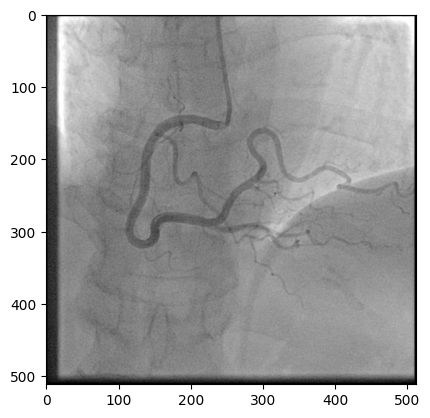

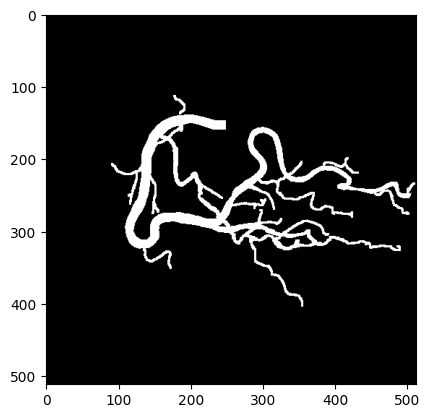

In [9]:
import cv2
img = cv2.imread(STEP2_Large_Small_Artery_Train[0])
mask = cv2.imread(STEP2_Large_Small_Artery_Train[0].replace('image', 'mask'))
print(img.shape, mask.shape)
print(img.min(), img.max(), mask.min(), mask.max())

import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()
plt.imshow(mask)
plt.show()


In [10]:
import shutil
import sys, os 
import json 
def json_maker_for_SAM_Med2D(train_data_list, save_dir, test_data_list):
    image2label_train = {}
    for idx in range(len(train_data_list)):
        img_name = str(os.path.basename(train_data_list[idx]))
        img_name = img_name.replace('.png', f'-{train_data_list[idx].split("/")[8]}.png')
        
        img_data_path = train_data_list[idx]
        mask_data_path = train_data_list[idx].replace('image', 'mask')
        shutil.copy(img_data_path, os.path.join(save_dir, 'images', img_name))
        shutil.copy(mask_data_path, os.path.join(save_dir, 'masks', img_name))
        
        # image2label_train, image2label_test에 for문으로 추가 (경로는 save_dir/{images,masks}/os.path.basename)
        img_path = f"{save_dir.split('/')[-1]}/images/{img_name}"
        mask_path = f"{save_dir.split('/')[-1]}/masks/{img_name}"
        image2label_train[img_path] = [mask_path]
    
    label2image_test = {}
    for idx in range(len(test_data_list)):
        img_name = str(os.path.basename(test_data_list[idx]))
        img_name = img_name.replace('.png', f'-{test_data_list[idx].split("/")[8]}-Test.png')
        
        test_img_data_path = test_data_list[idx]
        test_mask_data_path = test_data_list[idx].replace('image', 'mask')
        shutil.copy(test_img_data_path, os.path.join(save_dir, 'images', img_name))
        shutil.copy(test_mask_data_path, os.path.join(save_dir, 'masks', img_name))
        
        img_path = f"{save_dir.split('/')[-1]}/images/{img_name}"
        mask_path = f"{save_dir.split('/')[-1]}/masks/{img_name}"
        label2image_test[mask_path] = img_path
    
    # json 저장
    with open(os.path.join(save_dir, 'image2label_train.json'), 'w', encoding='utf-8') as f:
        json.dump(image2label_train, f, ensure_ascii=False, indent=4)
    with open(os.path.join(save_dir, 'label2image_test.json'), 'w', encoding='utf-8') as f:
        json.dump(label2image_test, f, ensure_ascii=False, indent=4)
    return True 

json_maker_for_SAM_Med2D(STEP1_Large_Artery_Train, data_STEP1_dir, ARCADE_Test_files)
json_maker_for_SAM_Med2D(STEP1_Large_Artery_Train_with_Synthetic, data_STE1_SYN_dir, ARCADE_Test_files)
json_maker_for_SAM_Med2D(STEP2_Large_Small_Artery_Train, data_STEP2_dir, ARCADE_Test_files)
    

True